In [1]:
# @title Dowloand the demo data
# Let's start with loading the image for segmentation

!wget https://polybox.ethz.ch/index.php/s/ddFUpadTSRgDycr/download -O image_examples.zip
!unzip image_examples.zip
%cd /content/for_segmentation/
%cd /content

--2024-10-22 07:34:25--  https://polybox.ethz.ch/index.php/s/ddFUpadTSRgDycr/download
Resolving polybox.ethz.ch (polybox.ethz.ch)... 129.132.71.243
Connecting to polybox.ethz.ch (polybox.ethz.ch)|129.132.71.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3054155 (2.9M) [application/zip]
Saving to: ‘image_examples.zip’

image_examples.zip  100%[===================>]   2.91M  3.12MB/s    in 0.9s    

2024-10-22 07:34:26 (3.12 MB/s) - ‘image_examples.zip’ saved [3054155/3054155]

Archive:  image_examples.zip
   creating: for_segmentation/
  inflating: for_segmentation/tool.jpg  
  inflating: for_segmentation/.DS_Store  
  inflating: for_segmentation/coffee_tools.jpg  
  inflating: for_segmentation/notebook.jpg  
  inflating: for_segmentation/hemostata_pencil.jpg  
  inflating: for_segmentation/books_tools.jpg  
  inflating: for_segmentation/qr_code.jpg  
  inflating: for_segmentation/hemostat.jpg  
/content/for_segmentation
/content


In [2]:
# @title Basic imports, auxiliary functions for image loading
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_img(img_path):
  img = Image.open(img_path)
  img = np.asarray(img) / 255
  return img

In [3]:
# @title Auxiliary function for converting labels to colors

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def labels_to_colors(labels, K):
    """
    Converts an integer label to its corresponding color.
    """

    # Get a color palette from a colormap (tab20) and convert it to RGB
    color_palette = plt.cm.get_cmap('rainbow', K)(range(K))[:, :3]

    colors = color_palette[labels]

    return colors, color_palette

In [5]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

# load image
img = load_img('/content/for_segmentation/books_tools.jpg')

# downsample for faster demo
# img = img[::4, ::4]

img_height, img_width, n_channels = img.shape

# convert image to data points
X = img.reshape([-1, n_channels])

# estimate the optimal h
h = estimate_bandwidth(X, quantile=0.2, n_samples=500)
# run mean shift
ms = MeanShift(bandwidth=h, bin_seeding=True)
ms.fit(X)

# Get the labels and cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

K = cluster_centers.shape[0]
print(f'Number of detected clusters: {K}')
print(f'Cluster centers: {cluster_centers}')

Number of detected clusters: 6
Cluster centers: [[0.90384858 0.89334933 0.87468972]
 [0.20659936 0.2098486  0.22336953]
 [0.99710271 0.8477846  0.24956109]
 [0.8822844  0.20208598 0.1919717 ]
 [0.11051913 0.19663707 0.63218224]
 [0.30599564 0.662268   0.82754884]]


<ipython-input-3-6da24f72de80>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('rainbow', K)(range(K))[:, :3]


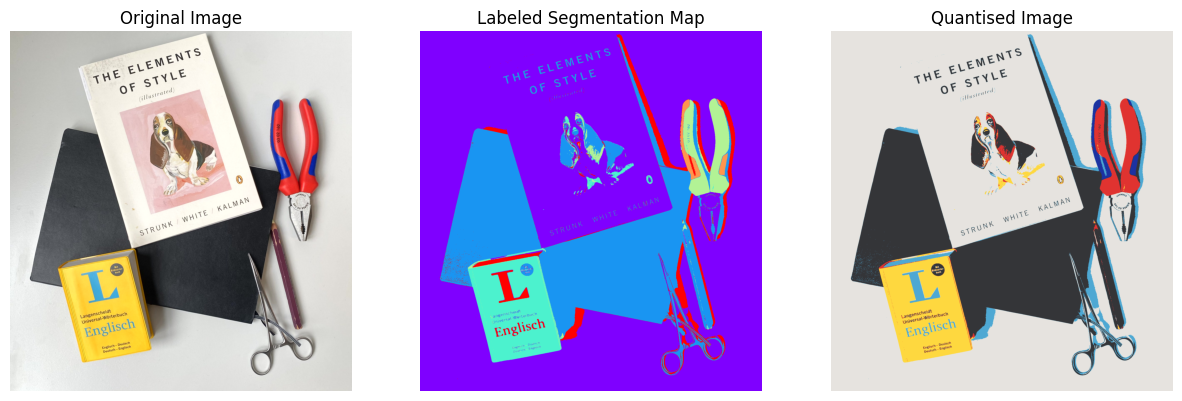

In [6]:
import matplotlib.pyplot as plt

# Get quantised image
quantised_image = cluster_centers[labels].reshape(img.shape)

# Get quantised image
colors, palette = labels_to_colors(labels, K=K)
image_segments = colors.reshape([img_height, img_width, 3])

# Visualise everything
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Labeled Image (each segment will have a different color)
# We use the labels to color each region distinctly
plt.subplot(1, 3, 2)
plt.imshow(image_segments, interpolation=None)
plt.title('Labeled Segmentation Map')
plt.axis('off')

# Segmented Image (clusters visualized by their mean color)
plt.subplot(1, 3, 3)
plt.imshow(quantised_image, interpolation=None)
plt.title('Quantised Image')
plt.axis('off')

plt.savefig('meanshift.jpg', dpi=300)
plt.show()